In [11]:
import random
import numpy as np
from scipy import ndimage, misc
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
X_train = np.load('./X_train.npy')
Y_train = np.load('./Y_train.npy')
X_test = np.load('./X_test.npy')

In [13]:
print(X_train.shape)
print(Y_train.shape)

(7726, 700, 700)
(7726,)


/Users/dwei/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app
/Users/dwei/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


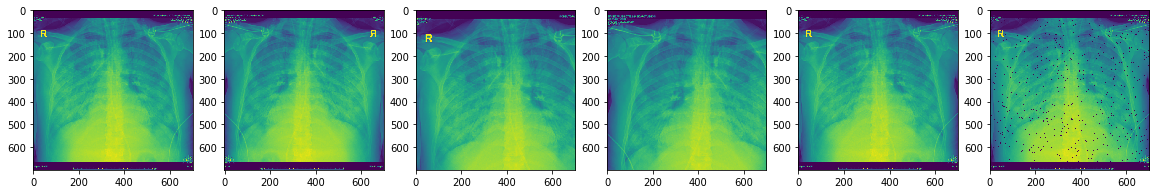

In [14]:
def poisson_noise(X):
    vals = len(np.unique(X))
    vals = 2 ** np.ceil(np.log2(vals))
    noisy = np.random.poisson(X * vals) / float(vals)
    return noisy

def speckle_noise(X):
    row,col = X.shape
    s_vs_p = 0.5
    amount = 0.02
    out = np.copy(X)
    num_salt = np.ceil(amount * X.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in X.shape]
    out[coords] = 1
    num_pepper = np.ceil(amount* X.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in X.shape]
    out[coords] = 0
    return out

def flip_2D(X):
    return np.fliplr(X)

def clockwise_in_2D(X):
    toReturn = np.zeros((X.shape[0], X.shape[1]))
    for i in range(X.shape[1]):
        angle = random.randint(20, 45)
        temp = ndimage.rotate(X[:,:], angle, reshape=False)
        temp = ndimage.zoom(X[:,:], 1.2)
        temp = temp [0:700, 0:700]
        toReturn[:,:] = temp
    return toReturn

def counter_in_2D(X):
    toReturn = np.zeros((X.shape[0], X.shape[1]))
    for i in range(X.shape[1]):
        angle = random.randint(-90, -20)
        temp = ndimage.rotate(X[:,:], angle, reshape=True)
        temp = ndimage.zoom(X[:,:], 1.2)
        temp = temp [0:700, 0:700]
        toReturn[:,:] = temp
    return toReturn

fig,axs = plt.subplots(1,6, figsize=(20,20))
n = np.random.randint(0,X_train.shape[0])
axs[0].imshow(X_train[n])
axs[1].imshow(flip_2D(X_train[n]))
axs[2].imshow(clockwise_in_2D(X_train[n]))
axs[3].imshow(counter_in_2D(flip_2D(X_train[n])))
axs[4].imshow(poisson_noise(X_train[n]))
axs[5].imshow(speckle_noise(X_train[n]))

In [ ]:
def augment(X, Y):
    Y_r = []
    X_r = []
    for i in range(len(X)):
        print(i)
        #1
        X_r.append(X[i])
        Y_r.append(Y[i])            
        #2
        X_r.append(flip_2D(X[i]))
        Y_r.append(Y[i])
        #3
        X_r.append(clockwise_in_2D(X[i]))
        Y_r.append(Y[i])
        #4
        X_r.append(counter_in_2D(X[i]))
        Y_r.append(Y[i])
        #5
        X_r.append(poisson_noise(X[i]))
        Y_r.append(Y[i])
        #6
        X_r.append(speckle_noise(X[i]))
        Y_r.append(Y[i])
    X_return = np.asarray(X_r)
    Y_return = np.asarray(Y_r)    
    return X_return, Y_return

print(X_train.shape)
print(Y_train.shape)
X_train, Y_train = augment(X_train, Y_train)    
print(X_train.shape)
print(Y_train.shape)

(7726, 700, 700)
(7726,)
0


/Users/dwei/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app
/Users/dwei/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111


In [19]:
def normalize_data(data): 
    for i in data:
        i = i / i.max()
    return data

X_train = normalize_data(X_train)
print('Image dataset have shape =', X_train.shape)
Y_train = np.array(Y_train)
print('Train label has shape =', Y_train.shape)

Image dataset have shape = (7726, 700, 700)
Train label has shape = (7726,)


In [ ]:
X_test = normalize_data(X_test)

In [20]:
np.save('./X_test.npy', X_test)
np.save('./X_train.npy', X_train)
np.save('./Y_train.npy', Y_train)